# Laboratorium 9

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_svmlight_file

%matplotlib inline

### 0. Wczytanie danych
Używając metody `load_svmlight_file` z modułu `sklearn` załaduj plik `lab13_files/breast_cancer`, który składa się z 2 elementów: macierzy `X` o wymiarach `683 x 10` oraz wektora `y` o dlugosci `683`. Macierz `X` opisuje badania 683 pacjentow, a wektor `y` ich diagnozy. 

In [2]:
X, y = load_svmlight_file('./breast-cancer.txt')
X = X.toarray()

### 1. Preprocessing
1.1 Korzystajac z `numpy.where` przenumeruj wektor y, tzn zamień wartości 2 i 4 na -1 i +1. 

1.2 Przeskaluj macierz X, tak żeby wartości w każdej kolumnie mieściły się w zakresie [0,1], innymi słowy przeskaluj niezależnie każdą kolumne $X_j$ wg wzoru:


$$
X_j = \frac{X_j-\min(X_j)}{\max(X_j)-\min(X_j)}
$$

In [3]:
# 1.1
y = np.where(y == 2, -1, y)
y = np.where(y == 4, 1, y)

# 1.2
min_values = np.min(X, axis=0)
max_values = np.max(X, axis=0)
X = (X - min_values) / (max_values - min_values)

# output
y, X

(array([-1., -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1.,  1.,
        -1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1., -1., -1.,  1., -1.,
        -1., -1., -1., -1., -1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,
         1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1.,
         1.,  1., -1., -1.,  1., -1.,  1.,  1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,
        -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
         1.,  1., -1.,  1., -1.,  1.,  1.,  1., -1., -1., -1.,  1., -1.,
        -1., -1., -1.,  1.,  1.,  1., -1.,  1., -1.,  1., -1., -1., -1.,
         1., -1., -1., -1., -1., -1., -1., -1., -1.,  1., -1., -1.,  1.,
        -1., -1.,  1., -1.,  1.,  1., -1., -1.,  1., -1., -1.,  1.,  1.,
        -1., -1., -1., -1.,  1.,  1., -1., -1., -1., -1., -1.,  1.,  1.,
         1., -1.,  1., -1.,  1., -1., -1., -1.,  1.

### 2. Wizualizacja
Narysuj dane używajac biblioteki `matplotlib`. Użyj wymiarów 1 i 2 z macierzy X, a jako kolory użyj wektora y. Pobaw sie parametrami "s" oraz "alpha" metody `plt.scatter` żeby uzyskać czytelną wizualizacje, np. taką jak poniżej.

<img src="lab13_files/d.png">

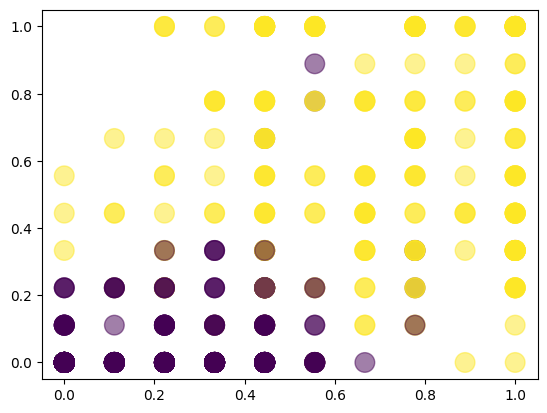

In [4]:
plt.scatter(X[:, 1], X[:, 2], s=200, c=y, alpha=0.5)

### 3. Regresja 

Przeprowadź regresje liniową wg wzoru:
$$
\beta = (X^TX)^{-1}X^Ty
$$

In [5]:
beta = np.linalg.inv(X.T @ X) @ X.T @ y

beta

array([-6.99534089, -0.18099245,  0.98590886,  0.42019705,  0.10457698,
       -0.59830206,  0.85739125, -0.31840576,  0.47729336,  0.16637872])

### 4. Wizualizacja Regresji

Zwizualizuj dane po zrzutowaniu na $\beta$ używajac metody `plt.hist`, tzn. narysuj histogramy $\beta X_+$ oraz
$\beta X_-$ gdzie $X_+$ to wiersze $X$ dla których $y=+1$ i analogicznie $X_-$. Postaraj się wygenerować czytelny wykres podobny do tego poniżej.

<img src="lab13_files/lr1.png">

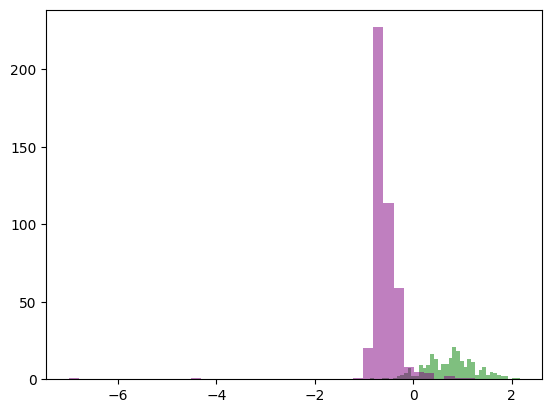

In [6]:
X_plus = X[y == 1]
X_minus = X[y == -1]

proj_X_plus = np.dot(X_plus, beta)
proj_X_minus = np.dot(X_minus, beta)

plt.hist(proj_X_plus, bins=40, alpha=0.5, color='green')
plt.hist(proj_X_minus, bins=40, alpha=0.5, color='purple')

plt.show()

### 5. Klasyfikacja

Przeprowadź "klasyfikacje" naszych pacjentów, ci, którzy zostali zrzutowani na wartość ujemną dostają etykiete $-1$, a ci którzy na wartość dodatnia - etykiete $+1$

In [7]:
y = np.where(beta @ X.T < 0, -1, 1)

y

array([-1,  1, -1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1,  1, -1,  1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1,  1, -1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1,  1,
        1, -1,  1,  1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1,
       -1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1,
        1, -1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1,
       -1,  1,  1,  1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1, -1,  1, -1,
       -1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,
       -1,  1, -1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1,
       -1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1,
        1,  1, -1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1,
        1, -1,  1,  1,  1

### 6. Ewaluacja

Policz jak dokładny jest ten model, tzn. jak duży jest zbiór
$ \{ (x_i,y_i) : \mathrm{sign}(\beta x_i) = y_i \} $
w stosunku do rozmiaru całego $y$

Powinno udać się uzyskać wynik na poziomie 93-94%

In [8]:
len(set(tuple([tuple(X[i]), y[i]]) for i in range(len(y)) if np.sign(beta @ X[i]) == y[i])) / len(y)

0.9882869692532943

### 7. Regularyzacja 
Dodaj parametr `C` do regresji liniowej
$$
\beta = (X^TX + \tfrac{1}{C}I)^{-1}X^Ty
$$

gdzie $I$ - macierz identyczności. 

Dla jakiej wartości `C` wynik jest najlepszy? Jaki wynik udało Ci sie uzyskać?

In [9]:
best: tuple = [0, 0]

for power in range(100, -100, -1):
    custom_beta = np.linalg.inv(X.T @ X + (1 / 10 ** power) * np.eye(X.shape[1])) @ X.T @ y
    score = len(set(tuple([tuple(X[i]), y[i]]) for i in range(len(y)) if np.sign(X[i] @ custom_beta) == y[i])) / len(y)

    if score > best[0]:
        best = [score, power]

print(f"Best result {best[0]} for  c = 10 ** {best[1]}")

Best result 0.9677891654465594 for  c = 10 ** 100


### 8. Gratulacje
Właśnie stworzyłeś/-aś swój pierwszy klasyfikator (statystyczny model predykcji). 

Spróbuj zastosować go do innych danych.

### Zadanie dodatkowe

Zaimplementuj powyższą metode jako klase `LRClassifier` wyposażoną w następujące metody:

* konstruktor przyjmujący dwa parametry: 
    * `C` - stała z równania 
    * `scale` - zmienna boolowska (domyslnie `True`) która określa czy macierz `X` ma byc automatycznie znormalizowana (przeskalowana do `[0,1]`)
* `.fit(X, y)` która spowoduje obliczenie $\beta$, dla `X` - dowolnej macierzy, `y` - wektora etykiet skladajacego sie z dwóch unikalnych wartosci (mogą to byc np. 2 różne stringi)
* `.predict(X)`, która zwróci wektor zawierajacy na `i`tej pozycji etykiete "przewidzianą" przez nasz model (pamiętaj o skalowaniu jesli `scale==True`!)

Przykladowe użycie:

    clf = LRClassifier(C=100)
    Xt = np.array([[1, 0], [1, 1], [1, 2], [1, 3], [1, 4]])
    yt = np.array(['x', 'x', 'y', 'y', 'y'])
    clf.fit(Xt, yt)
    X = np.array([[1, -1], [1, 0.9], [1, 2.1]])
    print(clf.predict(X)) # ['x', 'x', 'y']

In [10]:
class LRClassifier:
    def __init__(self, C):
        self.c = C
        self.beta = None
        self.scaler = MinMaxScaler()
        self.value_dict: dict = {}
    
    def fit(self, X, y):
        X = self.scaler.fit_transform(X)
        X = np.c_[np.ones((X.shape[0], 1)), X]
        
        y_classes = np.unique(y)
        self.value_dict[y_classes[0]] = -1
        self.value_dict[y_classes[1]] = 1
        y = np.where(y == y_classes[0], -1, 1)
        
        _, features = X.shape

        self.beta = np.linalg.inv(X.T @ X + (1 / self.c) * np.eye(features)) @ X.T @ y
    
    def predict(self, X):
        X = self.scaler.transform(X)
        X = np.c_[np.ones((X.shape[0], 1)), X]

        y_pred = X @ self.beta

        return np.array([key for pred in np.where(y_pred <= 0, -1, 1) for key, value in self.value_dict.items() if value == pred])
    
clf = LRClassifier(C=100)
Xt = np.array([[1, 0], [1, 1], [1, 2], [1, 3], [1, 4]])
yt = np.array(['x', 'x', 'y', 'y', 'y'])
clf.fit(Xt, yt)

X = np.array([[1, -1], [1, 0.9], [1, 2.1]])
print(clf.predict(X)) # ['x', 'x', 'y']

['x' 'x' 'y']
